### Searching via sorting

Consider the phone book for Addis Ababa. Suppose that it has 1 million names in it.
But still, we can find a number easily because it is __alphabetically sorted__.

What would happen if the names were listed in the phone book in random order?

This is true in general - we can find items much faster in arrays that are __sorted__:

(In Python an array and a list are basically the same thing, in other programming languages they can be different.)

In [2]:
def search(L,item): 
    """Search in an unorted array"""
    for i in range(len(L)):
        sys.stdout.write('*')
        if L[i]==item:
            return i
    return -1

In [3]:
L = range(200)

In [4]:
search(L,100)

*****************************************************************************************************

100

Can we do it faster using the fact that  ```L``` is __sorted__?

Turns out the answer is __yes__

## Binary Search

__Input:__ Sorted array $L$ of length $n$, item $item$

__Output:__ Index $i$ such that $L[i]==item$ or $-1$ if no such $i$ exists.

__Operation:__ Check if $L[n/2]>item$.

If YES, then check if $L[n/4]>item$, if NO then check if $L[3n/4]>item$.

If first check was YES and second YES, check if $L[n/8]>item$.

If first check was YES and second NO, check if $L[3n/8]>item$.

If first check was NO and second NO, check if $L[7n/8]>item$.

If first check was NO and second YES, check if $L[5n/8]>item$.

....

continue in this way

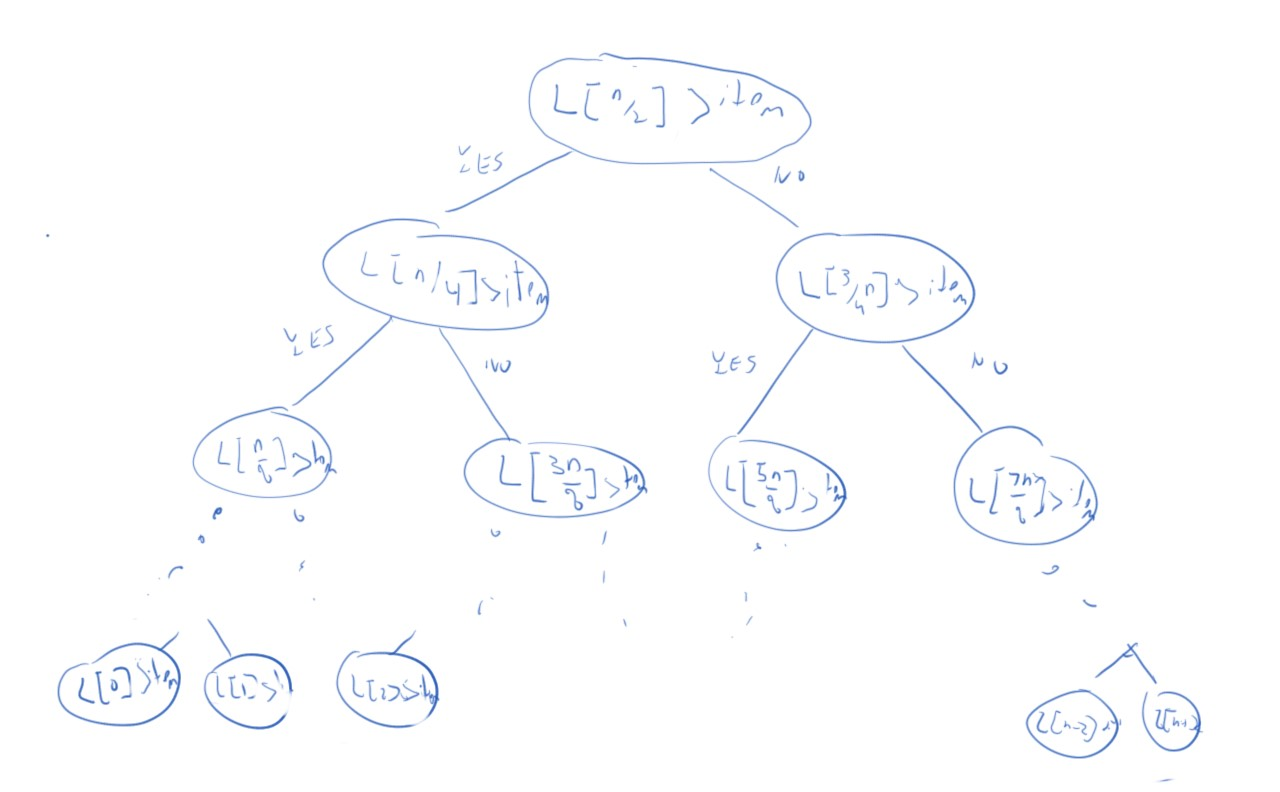

In [5]:
#overview of binary search

## Binary Search 

(a bit more formal operation)

__Input:__ Sorted array $L$ of length $n$, item $item$

__Output:__ Index $i$ such that $L[i]==item$ or $-1$ if no such $i$ exists.

__Operation:__ 

Check if $L[n/2]<item$:

* if YES, continue search in $L[0:n/2]$
* if NO, continue search in $L[n/2:n]$



In [6]:
def bin_search(L,item):
    sys.stdout.write('*')
    n = len(L)
    if not n:
        return -1
    m = int(n/2)
    if L[m]==item:
        return m
    if L[m]>item:
        return bin_search(L[:m],item)
    res = bin_search(L[m+1:n],item)
    if res==-1:
        return -1
    return m+1+res
    
        

In [7]:
search(L,100)

*****************************************************************************************************

100

In [8]:
bin_search(L,100)

********

100

If you run a binary search on a string of length $n$, then in one step we reduce the problem to a string of length $n/2$, in another step to a string of length $n/4$, and so on.

So the number of steps is the number of items in the sequence $n,n/2,n/4,n/8,\ldots,1$.

In other words, the number of steps binary search takes is the number $t$ such that $n/2^t \leq 1$, which means $t=\rceil log_2 n \rceil \leq \log_2 n + 1$.

$\log_2 n$ is much much smaller than $n$.

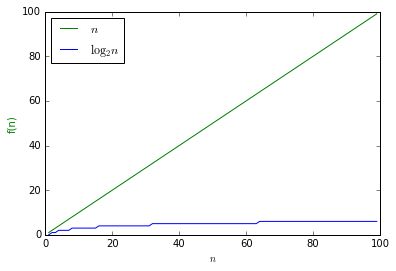

In [26]:
# compare n with log_2 n

In particular, if Facebook wants to search for a user in the data base of $10^9$ users, then if they keep the list sorted, they can do it in $30$ steps instead of $1,000,000,000$. 

For example, Facebook can have a list of all the emails of their users, sorted by their name.
Now, given any string ```name```,  in 30 steps they can find the email corresponding to this user.

Let's be more specific and, since we don't have the list of Facebook users, consider the list of students in this course.

Suppose we have this list of teams in this course:

In [16]:
groups = ['1:asmare habtemu, biniam kidane, lewi mekonnen', '2:gatlyak chnol-pat, ochan odoll-oqalla, samuel testage', '3:dawit fikru, kenasa desta, medin seid', '4:amina bedri, eman hassen, lidya jegnaw', '5:abreham tuna, haile g/selassie, mikiyas legesse', '6:mintesinot tefera, surafel lewtu, tariku erena', '7:abdurezak temam, adonay geremew, henok mersha', '8:hana alselam-haji, hoodo muktar, nasra dayib', '9:hassen ali, kiflom leul, yosef enawgaw', '10:eskedar tewabe, tsegereda sebhat, zakira tebarek', '11:helina tewodros, nardos gessese', '12:mebrhit girmay, mekides muluneh, nejat beshir', '13:elsaye loha, h/mariam shimeles, natinael adelew', '14:betelehem eshetu, bethelhem dessalegn', '15:hasane abdi, ibrahim ahmed, nour ahmed', '16:shambel abate, tigabu g/cherkos, yonatan wesenyelah', '17:haymanot gidena, kumneger worke, tsega hailu', '18:mebrahtu lwelo', '19:misgina gebretsadik', '20:hibist wondmeggn, kalkidan muluneh, meskerem birhanu', '21:banchiayehu asrat, elsabet bizuneh, yetnayet birhanu', '22:aman musa-umare, mohammed nuru, tibebu solomon, zelalem addisu', '23:kewser nassir, radiya behredin, urji hussen', '24:adem mohammed, amanuel asfaw, natol gizaw', '25:mesfin tamiru, shambel a, yospeh tadewos', '26:betelhem walelign, eden ketema, hana tariku', '27:ayantu alene, eden teklu, simret tekalign', '28:abinet mulugeta, bezawit h/mariam, yordano jemberu', '29:daniel hagos, zelalem amare', '30:wondimu yohannes, yospeh tadewos']

We can make it into a list of pairs of the form _(team number, student)_

In [17]:
pairs = []
for s in groups:
    i = s.index(":")
    team = int(s[0:i])
    for name in s[i+1:].split(', '):
        pairs.append([team,name])
print pairs

[[1, 'asmare habtemu'], [1, 'biniam kidane'], [1, 'lewi mekonnen'], [2, 'gatlyak chnol-pat'], [2, 'ochan odoll-oqalla'], [2, 'samuel testage'], [3, 'dawit fikru'], [3, 'kenasa desta'], [3, 'medin seid'], [4, 'amina bedri'], [4, 'eman hassen'], [4, 'lidya jegnaw'], [5, 'abreham tuna'], [5, 'haile g/selassie'], [5, 'mikiyas legesse'], [6, 'mintesinot tefera'], [6, 'surafel lewtu'], [6, 'tariku erena'], [7, 'abdurezak temam'], [7, 'adonay geremew'], [7, 'henok mersha'], [8, 'hana alselam-haji'], [8, 'hoodo muktar'], [8, 'nasra dayib'], [9, 'hassen ali'], [9, 'kiflom leul'], [9, 'yosef enawgaw'], [10, 'eskedar tewabe'], [10, 'tsegereda sebhat'], [10, 'zakira tebarek'], [11, 'helina tewodros'], [11, 'nardos gessese'], [12, 'mebrhit girmay'], [12, 'mekides muluneh'], [12, 'nejat beshir'], [13, 'elsaye loha'], [13, 'h/mariam shimeles'], [13, 'natinael adelew'], [14, 'betelehem eshetu'], [14, 'bethelhem dessalegn'], [15, 'hasane abdi'], [15, 'ibrahim ahmed'], [15, 'nour ahmed'], [16, 'shambel 

Now we can sort these pairs based on student name:

In [18]:
def name(pair):
    return pair[1]

pairs = sorted(pairs,key=name) 
print pairs

[[7, 'abdurezak temam'], [28, 'abinet mulugeta'], [5, 'abreham tuna'], [24, 'adem mohammed'], [7, 'adonay geremew'], [22, 'aman musa-umare'], [24, 'amanuel asfaw'], [4, 'amina bedri'], [1, 'asmare habtemu'], [27, 'ayantu alene'], [21, 'banchiayehu asrat'], [14, 'betelehem eshetu'], [26, 'betelhem walelign'], [14, 'bethelhem dessalegn'], [28, 'bezawit h/mariam'], [1, 'biniam kidane'], [29, 'daniel hagos'], [3, 'dawit fikru'], [26, 'eden ketema'], [27, 'eden teklu'], [21, 'elsabet bizuneh'], [13, 'elsaye loha'], [4, 'eman hassen'], [10, 'eskedar tewabe'], [2, 'gatlyak chnol-pat'], [13, 'h/mariam shimeles'], [5, 'haile g/selassie'], [8, 'hana alselam-haji'], [26, 'hana tariku'], [15, 'hasane abdi'], [9, 'hassen ali'], [17, 'haymanot gidena'], [11, 'helina tewodros'], [7, 'henok mersha'], [20, 'hibist wondmeggn'], [8, 'hoodo muktar'], [15, 'ibrahim ahmed'], [20, 'kalkidan muluneh'], [3, 'kenasa desta'], [23, 'kewser nassir'], [9, 'kiflom leul'], [17, 'kumneger worke'], [1, 'lewi mekonnen']

In [19]:
teams, names = zip(*pairs)
print names

('abdurezak temam', 'abinet mulugeta', 'abreham tuna', 'adem mohammed', 'adonay geremew', 'aman musa-umare', 'amanuel asfaw', 'amina bedri', 'asmare habtemu', 'ayantu alene', 'banchiayehu asrat', 'betelehem eshetu', 'betelhem walelign', 'bethelhem dessalegn', 'bezawit h/mariam', 'biniam kidane', 'daniel hagos', 'dawit fikru', 'eden ketema', 'eden teklu', 'elsabet bizuneh', 'elsaye loha', 'eman hassen', 'eskedar tewabe', 'gatlyak chnol-pat', 'h/mariam shimeles', 'haile g/selassie', 'hana alselam-haji', 'hana tariku', 'hasane abdi', 'hassen ali', 'haymanot gidena', 'helina tewodros', 'henok mersha', 'hibist wondmeggn', 'hoodo muktar', 'ibrahim ahmed', 'kalkidan muluneh', 'kenasa desta', 'kewser nassir', 'kiflom leul', 'kumneger worke', 'lewi mekonnen', 'lidya jegnaw', 'mebrahtu lwelo', 'mebrhit girmay', 'medin seid', 'mekides muluneh', 'mesfin tamiru', 'meskerem birhanu', 'mikiyas legesse', 'mintesinot tefera', 'misgina gebretsadik', 'mohammed nuru', 'nardos gessese', 'nasra dayib', 'nat

And define binary search to use this key too:

In [20]:
def bin_search_name(L,s_name):
    n = len(L)
    if not n:
        return -1
    m = int(n/2)
    if name(L[m])==s_name:
        return m
    if name(L[m])>s_name:
        return bin_search_name(L[:m],s_name)
    res = bin_search_name(L[m+1:n],s_name)
    if res==-1:
        return -1
    return m+res+1
    
        

In [21]:
idx = bin_search_name(pairs,'Abinet Mulugeta')
print "Group number", pairs[idx][0]

Group number 29


In [22]:
idx = bin_search_name(pairs,'Yonatan Wesenyelah')
print "Group number", pairs[idx][0]

Group number 29


# Dictionaries

This kind of tasks - storing information that you want to access using some _key_, is so common that python has a special data structure for it called a __dictionary__

In [132]:
groups_dict = { 'adem mohammed': 24, 'samuel testage': 2, 'Kalkidan Muluneh': 20 }

In [1]:
groups_dict['samuel testage']

2


We can add to ```groups_dict``` _all_ the pairs as follows:

In [156]:
for pair in pairs:
    groups_dict[pair[1]] = int(pair[0])
print groups_dict

{'betelhem walelign': 26, 'Eman Hassen': 4, 'Aman Musa-Umare': 22, 'Haymanot Gidena': 17, 'Hassen Ali': 9, 'wondimu yohannes': 30, 'Helina Tewodros': 11, 'Kewser Nassir': 23, 'zelalem amare': 29, 'elsaye loha': 13, 'mohammed nuru': 22, 'tariku erena': 6, 'Ibrahim Ahmed': 15, 'Abdurezak Temam': 7, 'mekides muluneh': 12, 'simret tekalign': 27, 'surafel lewtu': 6, 'natol gizaw': 24, 'Adonay Geremew': 7, 'tigabu g/cherkos': 16, 'kewser nassir': 23, 'lidya jegnaw': 4, 'yonatan wesenyelah': 16, 'haile g/selassie': 5, 'Bezawit H/Mariam': 28, 'daniel hagos': 29, 'Mesfin Tamiru': 25, 'Yetnayet Birhanu': 21, 'eden ketema': 26, 'adonay geremew': 7, 'Lewi Mekonnen': 1, 'kumneger worke': 17, 'Banchiayehu Asrat': 21, 'Natol Gizaw': 24, 'mesfin tamiru': 25, 'Amina Bedri': 4, 'Hana Alselam-Haji': 8, 'Samuel Testage': 2, 'Wondimu Yohannes': 30, 'medin seid': 3, 'Yosef Enawgaw': 9, 'Ochan Odoll-Oqalla': 2, 'hoodo muktar': 8, 'mikiyas legesse': 5, 'asmare habtemu': 1, 'adem mohammed': 24, 'samuel testage

### Are dictionaries implemented using sorted arrays?

__Problem:__ What if you add a new element - do you need to re-sort the whole array?

__Two main solutions:__ _Binary search trees_ and _hash tables_.

Python  uses hash tables and this is what we explain next.

# Hash tables*

__Idea:__ Design a function ```h(s)``` such that for every string ```s``` , ```h(s)``` is a number between $0$ and $n$. Then, we can have a list ```L``` of length $n$ such that ```L[h(s)]``` will be the group of student ```s```

So, to get the group  of the student  with name ```name```, all we need to do is to compute ```h(name)``` and then we can get this student in only one step. 

__Problems:__

* How do you find such a function?
* What do you do if you have two different students of with names ```name1``` and ```name2``` such that ```h(name1)==h(name2)```?
* How small can we make $n$? Note that it costs us in computer _memory_ to make $n$ too big.

Let's start with the first problem: we want to find a function $h$ that takes every string $s$ to a somewhat "random number" between $1$ and $n$. (in our case $n=81$)

One simple function is the following: treat each letter as a number from $1$ to $26$ and add all the letters in the name modulo $n$ .

(note that this is a simple function that works well sometimes but not always, and in particular will always map "boaz" and "azbo" to the same number; there are better "hash functions" that are used in Python and other systems.)

In [9]:
def letter_to_number(c):
    if c==' ':
        return 27
    if c=='-':
        return 28
    return 1+ord(c)-ord('a')

letter_to_number('c')

3

In [10]:
def h(s,n):
    res = 0
    for c in s.lower():
        res += letter_to_number(c)
    return res % n

In [14]:
h("boaz barak",83)

21

We don't have the list of all Facebook users, so let's test how well it works for the students in this class:

In [23]:
len(pairs)

83

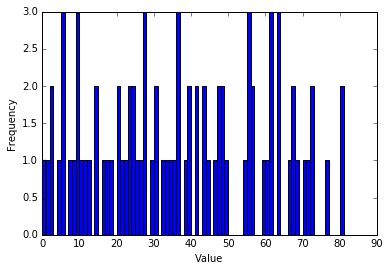

In [24]:
integer_hist([h(pair[1],83) for pair in pairs])

We see that the function is "almost" good, in that most places only have one student matched to it, but  several  places have two students and a few have three students. 

So now we can have a list ```groups_list``` of length 83, where for every ```i```, ```groups_list[i]``` will contains the list of all pairs corresponding to the students with name ```s``` such that ```h(s)==i```.

For every ```i```, the list ```groups_list[i]``` will have at most three pairs.

So, if we want to get the group of a student with name ```s``` we need to do it in at most four steps:

* We let ```L=groups_list[h(s)]```
* Then we scan this short list ```L``` to find the pair of the form ```[ t , s]``` 

## Summary of data structures

Often the right data structure can make all the difference:


|Data structure|Get(key).....|Insert(key)..|Other properties              |
|--------------|-------------|-------------|------------------------------|
|Unsorted list |$n$          |$<10$ (*)    | Supports any objects         |
|Sorted array  |$\log n$     |$n$          | Supports range queries       |
|Search trees  |$\log n$     |$\log n$     | Support range queries        |
|Hash table    |$<10$        |$<10$        | Supports non-comparable keys |


__Note:__ Data structures is a _huge_ topic and if you study more computer science you will hear about more concepts such as stacks, queues, heaps, and many more.

# Graphics on a computer

The image you see is composed of about 1,000,000 little dots known as _pixels_ ($1024\times 768$).

Each pixel can be set to a different color, and that produces the image.

All colors are obtained by mixing <span style="color:red">red</span>, <span style="color:green">green</span> and <span style="color:blue">blue</span>   

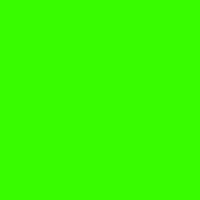

In [30]:
demo_RGB()

Python allows us to take an array of color values for the pixels and plot it on the screen. 
To make things easier, we implemented some helper functions to do it:

* ```color(red,green,blue)```: takes three numbers and simply returns a list of these three numbers, but it can also be called with named parameters and has defeault values.

* ```empty_screen(height,width)```: returns an ```width``` $\times$ ```height``` array ```s``` (namely a list  of ```width``` lists, each of them is of  length ```height```). For every ```x``` between 0 and ```width``` and ```y``` between 0 and ```height```,  ```s[x][y] = color(255,255,255)```.

* ```plot_array(s)```: plots the array ```s``` on the screen where ```s[0][0]``` corresponds to the bottom left corner and ```s[width][length]``` corresponds to the top right corner.

We will now demonstrate how to use these functions:

In [82]:
color(20,30,40)

(20, 30, 40)

In [83]:
color(blue=255)

(0, 0, 255)

In [84]:
s = empty_screen(100,100)

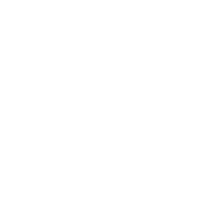

In [85]:
plot_array(s)

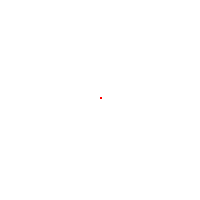

In [86]:
s[50][50] = color(red=255,blue=0,green=0)
plot_array(s)

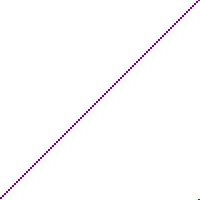

In [87]:
import time
for i in range(100):
    s[i][i]=color(red=128,blue=128)
    plot_array(s)
    # time.sleep(0.01)

In [88]:
import math
def sine(angle):
    return math.sin((angle/360.0)*2*math.pi)
def cosine(angle):
    return math.cos((angle/360.0)*2*math.pi)

In [125]:
def cannon(angle,speed,time, gravity=9.8):
    x = speed*time*cosine(angle)
    y = speed*time*sine(angle) -(gravity/2.0)*(time**2)
    return round(x,3),round(y,3)

In [110]:
cannon(45,10,100,gravity=0)

(707.107, 707.107)

In [111]:
cannon(45,10,200,gravity=0)

(1414.214, 1414.214)

In [112]:
cannon(30,10,100,gravity=0)

(866.025, 500.0)

In [113]:
cannon(70,10,100,gravity=0)

(342.02, 939.693)

In [123]:
cannon(45,100,10)

(707.107, 217.107)

In [126]:
cannon(45,100,20)

(1414.214, -545.786)

In [120]:
cannon(30,100,10)

(866.025, 10.0)

In [121]:
cannon(60,100,10)

(500.0, 376.025)

In [90]:
def draw_cannon(angle,speed):
    s = empty_screen(100,100)
    x =0
    y =0
    t=0.0
    while x<100 and y>=0 and y<100:
        s[x][y] = color(red=255)
        (x,y) = cannon(angle,speed,t)
        x= int(x)
        y = int(y)
        t += 1.0/speed
        plot_array(s)
    

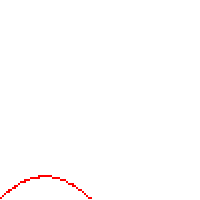

In [92]:
draw_cannon(45,30)

# Quiz tomorrow

* One hour on the computer.
* Be here before __9:15am__: half the people will take the quiz, half will do lab work, and then switch.
* Some questions would be easier and some harder - _don't feel bad if you can't solve them all!_ (or even most)
* quiz is mostly for us, so we know what concepts you know and what concepts you don't.
* some questions would be very similar to your labworks. 
* if you didn't complete the labworks: talk to your friends that did complete it, and make sure you understand the solutions.


# Labwork

Choose one of two projects to complete: (if you finish one, you can also try the other)

In these projects you can use all the functions that you have built in previous lab works.

### Project 1: Linear equations solver

Write a function ```equation_solver``` that asks a user for the number $n$ of equations and variables, and then for $n$ equations of the form ```10y-0.5x+25z + 50 = 0``` and prints  a solution of the form  ```x=10.0, y=0.5, z=2.0```

The function can use the function ```solve``` we've seen before, any helper functions you already made or new ones.
In particular, write the helper functions

* ```parse_equation(s)``` that  takes a string representing an equation in $n$ variables and returns a list of $n+1$ numbers that represents the coefficients for all variables (in alphabetical order) and the constant coefficient.

* ```get_variables(user_equations)``` that takes a list of strings corresponding to equations and returns a sorted list of all variables appearing in those equations. Each variable should only appear once so if the equations are in $n$ variables then the length of the list that is returned should be $n$.

The function ```equation_solver``` itself  needs to be of the form below.

__bonus:__ handle equations with missing variables, equations where the right hand side is not just ```= 0```, equations that have infinitely many or no solutions (for the latter one you might need to modify ```solve```)


In [14]:
### HELPER FUNCTIONS:

def make_first_coeff_nonzero_general(eqs):
    for i in range(len(eqs)):
        if eqs[i][0]:
            eqs[0], eqs[i] = eqs[i], eqs[0]
            return
    sys.exit("oops:  all first coefficients are zero")
    return 

def multiply_equation(eq,num):
    """Multiply all coefficients of equation eq by number num. 
       Return result"""
    res = []
    for x in eq:
        res += [x*num]
    return res

def add_equations(eq1,eq2):
    """Add eq1 and eq2. Return result"""
    res = []
    for i in range(len(eq1)):
        res.append(eq1[i]+eq2[i])
    return res

def solve(eqs):
    n = len(eqs)
    if n==0:
        return []
    make_first_coeff_nonzero_general(eqs)  # make 1st coef of 1st equation nonzero
    eqs[0] = multiply_equation(eqs[0],1/eqs[0][0]) 
    # make 1st coef of 1st  equation equal 1
    
    for i in range(1,n-1):
        eqs[i] = add_equations(eqs[i],multiply_equation(eqs[0],-eqs[i][0])) # zero out first coefficient in eqs 1,2
    # make 1st coef of 2nd .. n-th equation equal zero
    
    rest_equations = []
    for i in range(1,n):
        rest_equations.append(eqs[i][1:n+1])
        
    solutions = solve(rest_equations)
    # solve remainder of  equations for remainder of  variables 

    x =  - eqs[0][n]
    for i in range(1,n):
        x -= eqs[0][i]*solutions[i-1]
    # solve 1st variable using solution for 2nd and 3rd variable
    
    return [x] + solutions

In [129]:
def get_variables(user_equations):
    """
    Gets list of strings including some equations and returns a sorted list of all variables that
    appear in these equations.
    You can assume all variables are a single lower-case letter.
    """
    
    # YOUR CODE HERE
    # needs to return a list

In [ ]:
def parse_equation(s,variables):
    """
    Gets string input representing an equation in the variables in the sorted list `variables`
    and outputs a list `eq` of length `len(variables)+1` that contains the coefficents for 
    each variable (in alphabetical order) and the coefficient for the constant term.
    You can assume that each variable is a single lower-case letter
    """
    
    # YOUR CODE HERE
    # needs to return a list of length len(variables)+1

In [ ]:
def equation_solver():
    n = int(raw_input("Enter the number of equations / variables"))
  
    user_equations = []
    for i in range(n):
        s = raw_input("Enter equation number "+str(i)+":")
        user_equations.append(s) 
        
    variables = get_variables(user_equations) # you need to write get_variables
    eqs  = []
    for s in user_equations:
        eqs.append(parse_equation(s,variables)) # you need to write parse_equations
    
    solutions = solve(eqs)
    
    for i in len(solutions):
        print variables[i]+ " = "+str(solutions[i])    

### Project 2: Cannon game

Prepare a game for two players that will work as follows:

Each player chooses a _position_, _angle_ and _speed_ for their cannon.

Then the two cannons shoot and each player scores if they hit the other player's cannon.

__bonus__: handle the case that the cannonball goes higher than the size of the screen, showing when it goes back down.

Feel free to add other features to this game to make it more interesting.

In [1]:
# run this code to get graphics to work

In [2]:
%pylab

Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


In [3]:
%matplotlib inline

In [12]:
import sys
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import math
import IPython.display as dsp 

def empty_screen(w=100,h=100):
    res = [ [color(255,255,255) for i in range(h)] for j in range(w)]
    return res
    
def color(red=0,green=0,blue=0):
    return (red,green,blue) 

def array_to_image(array, scale=2):
    w = len(array)
    h = len(array[0])
    data = np.zeros((h*scale, w*scale, 3), dtype=np.uint8)
    for i in range(w):
        for j in range(h):
            for k in range(scale):
                for l in range(scale):
                    data[(h-1)*scale-(j*scale + k),i*scale+l] = array[i][j]
    img = Image.fromarray(data, 'RGB')
    img.save('my.png')
    return dsp.Image(filename='my.png')
    

def plot_array(array, scale=2):
    dsp.clear_output(True)
    dsp.display_png(array_to_image(array,scale))
    # sys.stdout.flush()

def sine(angle):
    return math.sin((angle/360.0)*2*math.pi)
def cosine(angle):
    return math.cos((angle/360.0)*2*math.pi)

In [2]:
def cannon_game(width,height):
    angle1 = int(raw_input("Player 1: enter your angle"))
    speed1 = int(raw_input("Player 1: enter your speed"))
    location1 = int(raw_input("Player 1: enter your location"))
    
    angle2 = 180-int(raw_input("Player 2: enter your angle"))
    speed2 = int(raw_input("Player 2: enter your speed"))
    location2 = width - int(raw_input("Player 2: enter your location"))
    
    draw_two_cannons(angle1,speed1,location1,angle2,speed2,location2,width,height) 
    # function you need to write to draw the path of the two cannons
    
    if will_it_hit(angle1,speed1,location2-location1):
        print "Player 1 hit player 2"
    if will_it_hit(180-angle2,speed2,location2-location1):
        print "Player 2 hit player 1"

In [ ]:
def will_it_hit(angle,speed,distance):
    """
    Return True if a cannon ball fired at this speed and angle will land back on the ground 
    at distance d that is at most one meter away from distance.
    """
    
    ### YOUR CODE HERE

In [ ]:
def draw_two_cannons(angle1,speed1,location1,angle2,speed2,location2,width,height):
    """
    Draw in two colors the trajectory of two cannonballs shot from these locations at the given widths and angles.
    Use a screen of the given width and height
    """
    
    ### YOUR CODE HERE
    ### You can learn from the draw_cannon function below.
    

In [5]:
def draw_cannon(angle,speed):
    s = empty_screen(100,100)
    x =0
    y =0
    t=0.0
    while x<100 and y>=0 and y<100:
        s[x][y] = color(red=255)
        (x,y) = cannon(angle,speed,t)
        x= int(x)
        y = int(y)
        t += 1.0/speed
        plot_array(s)

In [10]:
def cannon(angle,speed,time, gravity=9.8):
    x = speed*time*cosine(angle)
    y = speed*time*sine(angle) -(gravity/2.0)*(time**2)
    return round(x,3),round(y,3)

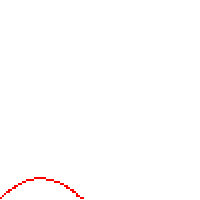

In [13]:
draw_cannon(45,20)